# RNN (Recurent Neural Network) - LSTM (Long Short Term Memory) - GRU (Gated REcurent Unit)





## RNN

In [2]:
# import Libraries 

import numpy as np 
import tensorflow as tf 
from tensorflow.keras.layers import Dense, SimpleRNN
from tensorflow.keras.models import Sequential 



In [3]:
# ignor warnings 
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Generate example data 
X =np.random.rand(100, 10, 1)
y = np.random.randint(0, 2, size=(100,))

In [5]:
X.shape, y.shape

((100, 10, 1), (100,))

In [6]:
# Define the model 
model = Sequential ([
    SimpleRNN(32, input_shape=(10, 1)), 
    Dense(1, activation='sigmoid')
])

In [7]:
# comple the model 
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [8]:
# train the model 

history = model.fit(X, y, epochs=10, batch_size=32)

Epoch 1/10


4/4 [==============================] - 1s 5ms/step - loss: 0.6918 - accuracy: 0.5500
Epoch 2/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6802 - accuracy: 0.5300
Epoch 3/10
4/4 [==============================] - 0s 4ms/step - loss: 0.6789 - accuracy: 0.5500
Epoch 4/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6780 - accuracy: 0.5800
Epoch 5/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6739 - accuracy: 0.5500
Epoch 6/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6714 - accuracy: 0.5600
Epoch 7/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6719 - accuracy: 0.5800
Epoch 8/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6738 - accuracy: 0.6200
Epoch 9/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6750 - accuracy: 0.6200
Epoch 10/10
4/4 [==============================] - 0s 3ms/step - loss: 0.6742 - accuracy: 0.6300


In [9]:
# Evaluate the model 
loss, accuracy = model.evaluate(X, y)
print('Test Loss:', loss)
print('Test Accuracy:', accuracy)

4/4 [==============================] - 0s 3ms/step - loss: 0.6727 - accuracy: 0.6300
Test Loss: 0.6727210879325867
Test Accuracy: 0.6299999952316284


# LSTM (Long Short Term Memory) is a special kind of  RNN, capable of learing long-term dependencies.                                                           

In [10]:
import seaborn as sns 
import numpy as np 
import pandas as pd 
import tensorflow as tf 
from tensorflow.keras.layers import Dense, LSTM 
from tensorflow.keras.models import Sequential

In [11]:
# laod flight data 
flights = sns.load_dataset('flights')

In [12]:
# convert data to time series 
df = pd.DataFrame({'value': flights['passengers'].values}, index=pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS'))
df.head()

,value
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [13]:
# split data into training and testiong sets 
train_size = int(len(df)*0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size]

In [14]:
# Normalize the data 
train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean)/train_std 
test_data = (test_data - train_mean)/train_std

Epoch 1/100
4/4 [==============================] - 2s 5ms/step - loss: 0.6700
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.5410
Epoch 3/100
4/4 [==============================] - 0s 5ms/step - loss: 0.4373
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.3430
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2694
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.2133
Epoch 7/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1843
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.1671
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.1658
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1708
Epoch 11/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1697
Epoch 12/100
4/4 [==============================] - 0s 4ms/step - loss: 0.1643
Epoch 13/100
4/4 [==============================] - 0s 5ms/st

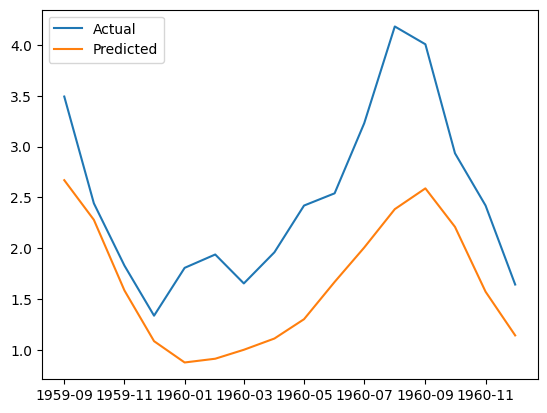

In [16]:
# Split data into training and testing sets
train_size = int(len(df) * 0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

# Normalize the data
train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean) / train_std
test_data = (test_data - train_mean) / train_std

# Convert data to sequences
def to_sequences(data, seq_length):
    X = []
    y = []
    for i in range(len(data)-seq_length-1):
        X_seq = data[i:(i+seq_length)].values
        X.append(X_seq)
        y_seq = data.iloc[i+seq_length].values[0]
        y.append(y_seq)
    return np.array(X), np.array(y)

seq_length = 12
X_train, y_train = to_sequences(train_data, seq_length)
X_test, y_test = to_sequences(test_data, seq_length)

# Reshape input to be [samples, time steps, features]
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Define the model
model = Sequential([
    LSTM(32, input_shape=(seq_length, 1)),
    Dense(1)
])

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the model
loss = model.evaluate(X_test, y_test)
print('Test Loss:', loss)

# Make predictions on test data
y_pred = model.predict(X_test)

# Plot the predictions and actual values
import matplotlib.pyplot as plt
plt.plot(test_data.index[seq_length+1:], y_test, label='Actual')
plt.plot(test_data.index[seq_length+1:], y_pred, label='Predicted')
plt.legend()
plt.show()

## let's build a simple RNN-based character-level text generator using a sample text. We'll use a sequence-to-sequence prediction approach to predict the next character in a sequence.

In [17]:
import numpy as np 
import tensorflow as tf 
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense 

In [20]:
# Sampel test data 
text ="hello world! this is a simple test exmple for rnn."
chars = sorted(list(set(text))) # get unique characters 

char_to_int = dict((c, i) for i, c in enumerate(chars))

int_to_char = dict((i, c) for i, c in enumerate(chars))

In [21]:
# Create input-output sequences 
seq_lenght =10
X=[]
y=[]

for i in range(len(text)-seq_length):
    seq_in = text[i:i + seq_length]
    seq_out = text[i + seq_length]
    X.append([char_to_int[char] for char in seq_in])
    y.append(char_to_int[seq_out])


X = np.reshape(X, (len(X), seq_length, 1))/float(len(chars)) # normalize 
y = tf.keras.utils.to_categorical(y)

In [26]:
# Define model 

model = Sequential([
    LSTM(128, input_shape=(X.shape[1], X.shape[2])),
    Dense(len(chars), activation='softmax')
])


# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=10, verbose=1)

Epoch 1/100
4/4 [==============================] - 2s 7ms/step - loss: 2.9310
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 2.8831
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 2.8422
Epoch 4/100
4/4 [==============================] - 0s 6ms/step - loss: 2.7714
Epoch 5/100
4/4 [==============================] - 0s 6ms/step - loss: 2.6820
Epoch 6/100
4/4 [==============================] - 0s 6ms/step - loss: 2.6407
Epoch 7/100
4/4 [==============================] - 0s 7ms/step - loss: 2.6205
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 2.6027
Epoch 9/100
4/4 [==============================] - 0s 6ms/step - loss: 2.6038
Epoch 10/100
4/4 [==============================] - 0s 6ms/step - loss: 2.5926
Epoch 11/100
4/4 [==============================] - 0s 6ms/step - loss: 2.5853
Epoch 12/100
4/4 [==============================] - 0s 6ms/step - loss: 2.5863
Epoch 13/100
4/4 [==============================] - 0s 7ms/st

In [34]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Sample text data
text = "hello world! this is a simple text example for rnn."
chars = sorted(list(set(text))) # Get unique characters
char_to_int = dict((c, i) for i, c in enumerate(chars))
int_to_char = dict((i, c) for i, c in enumerate(chars))

# Create input-output sequences
seq_length = 10
X = []
y = []

for i in range(len(text) - seq_length):
    seq_in = text[i:i + seq_length]
    seq_out = text[i + seq_length]
    X.append([char_to_int[char] for char in seq_in])
    y.append(char_to_int[seq_out])

X = np.reshape(X, (len(X), seq_length, 1)) / float(len(chars)) # Normalize
y = tf.keras.utils.to_categorical(y)

# Define model
model = Sequential([
    LSTM(128, input_shape=(X.shape[1], X.shape[2])),
    Dense(len(chars), activation='softmax')
])

# Compile and train
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.fit(X, y, epochs=100, batch_size=10, verbose=1)

# Predict a sequence
start = np.random.randint(0, len(X)-1)
pattern = X[start]
print("Seed:")
print("\"", ''.join([int_to_char[int(value*len(chars))] for value in pattern]), "\"")

for i in range(50): # Generate 50 characters
    x = np.reshape(pattern, (1, len(pattern), 1))
    prediction = model.predict(x, verbose=1)
    index = np.argmax(prediction)
    result = int_to_char[index]
    seq_in = [int_to_char[int(value*len(chars))] for value in pattern]
    print(result, end="")
    pattern = np.append(pattern, index/float(len(chars)))
    pattern = pattern[1:len(pattern)]

print("\n")

Epoch 1/100
5/5 [==============================] - 2s 5ms/step - loss: 2.9429
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 2.9141
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 2.8883
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 2.8642
Epoch 5/100
5/5 [==============================] - 0s 5ms/step - loss: 2.8385
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 2.7973
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 2.7486
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 2.7505
Epoch 9/100
5/5 [==============================] - 0s 5ms/step - loss: 2.7430
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 2.7298
Epoch 11/100
5/5 [==============================] - 0s 5ms/step - loss: 2.7217
Epoch 12/100
5/5 [==============================] - 0s 5ms/step - loss: 2.7137
Epoch 13/100
5/5 [==============================] - 0s 5ms/st

Here, we first convert our sample text into sequences of characters. Each sequence of characters (X) corresponds to a next character (y). The model is trained to predict y from X.

After training, we take a random seed sequence and use the model to predict the next 50 characters. The output will show the initial seed and the generated text based on it.

# GRU (Gated Recurrent Unit) is a variation of LSTM. It has fewer parameters than LSTM, as it lacks an output gate.

In [35]:
import seaborn as sns
import numpy as np 
import tensorflow as tf
from tensorflow.keras.layers import Dense, GRU  # Note the chage here 
from tensorflow.keras.models import Sequential 




In [36]:
# laod flight data 
flights = sns.load_dataset("flights")

In [37]:
# Convet data to time series 
df = pd.DataFrame({'value': flights['passengers'].values}, index=pd.date_range(start='1949-01-01', end='1960-12-01', freq='MS'))


In [38]:
# Split dat ionto training and testiong sets 

train_size = int(len(df)*0.8)
train_data, test_data = df.iloc[:train_size], df.iloc[train_size:]

In [39]:
# Normalize the data 

train_mean = train_data.mean()
train_std = train_data.std()
train_data = (train_data - train_mean)/train_std 
test_data = (test_data - train_mean)/train_std

In [41]:
# Convert data to sequences 

def to_sequences(data, seq_length):
    X=[]
    y=[]
    for i in range(len(data)-seq_length-1):
        X_seq = data[i:(i+seq_length)].values
        X.append(X_seq)
        y_seq = data.iloc[i+seq_length].values[0]
        y.append(y_seq)
    return np.array(X), np.array(y)

seq_length =12 
X_train, y_train = to_sequences(train_data, seq_length)
X_test, y_test = to_sequences(test_data, seq_length)

In [43]:
# Reshape input to be [Sameps, time steps, features]

X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))

In [44]:
# Define the model using GRU 
model = Sequential([
    GRU(32, input_shape=(seq_length,1)), # Note the change here 
    Dense(1)
])

In [48]:
# Compile the model 
model.compile(optimizer='adam', loss='mse')


# Train the model 
history = model.fit(X_train, y_train, epoch=100, batch_size=32)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "c:\Users\Saurabh Kumar\miniconda3\envs\tf_env\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\Saurabh Kumar\AppData\Local\Temp\ipykernel_1948\2997913188.py", line 6, in <module>
    history = model.fit(X_train, y_train, epoch=100, batch_size=32)
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\Saurabh Kumar\miniconda3\envs\tf_env\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
    raise e.with_traceback(filtered_tb) from None
  File "c:\Users\Saurabh Kumar\miniconda3\envs\tf_env\Lib\site-packages\keras\src\utils\traceback_utils.py", line 67, in error_handler
    filtered_tb = _process_traceback_frames(e.__traceback__)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
TypeError: Model.fit() got an unexpected keyword argument 'epoch'

During handling of the above except